# [112-2 多媒體技術與應用] Homework <br>

<font size = 4>
    請用.ipynb交作業，檔名用HW_學號_名稱.ipynb，例如: HW_0123456_黃大明.ipynb

## Q1 多元回歸(Multiple regression) (25%)


$$
({\bf{x}}_i,y_i) , {\bf{x}}_i = \begin{bmatrix} 1 \\ x_{i1} \\ \vdots \\ x_{id}\\ \end{bmatrix} \in R^{d+1}, \forall i=1,2,...,n 
$$

$$
{\bf{Y}} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\\ \end{bmatrix}, 
{\bf{\beta}} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_n\\ \end{bmatrix},
{\bf{X}} = \begin{bmatrix} \bf{X}_1^T \\ \bf{X}_2^T  \\ \vdots \\ \bf{X}_n^T \\ \end{bmatrix}
 = \begin{bmatrix} 1&x_{11}&...&x_{1d} \\ \ 1&x_{21}&...&x_{2d}  \\ \vdots \\ \ 1&x_{n1}&...&x_{nd} \\ \end{bmatrix} 
$$

**Regression:** $$\bf{Y}=  {\bf{X}}{\bf{\beta}}$$

$$
loss({\bf{\beta}})=(\bf{Y}-\hat{\bf{Y}})^T(\bf{Y}-\hat{\bf{Y}})
$$

<font size=4 color=red>**找${\bf{\beta}}$的closed-form solution**

${\bf{\beta}} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T\bf{Y}$

## Q2. 依據第Q1推出的公式做python程式(Numpy)撰寫 ，寫一個Multiple regression  (25%)<br>
Data在HW-RegressionExample.txt，第1欄是dependent variable(${\bf{Y}}$), 第2~5欄是independent variable(${\bf{X}}$)。<br><br>
<font size=4 color=red> 請用python print出算出來的$\beta$結果。</font>

In [1]:
import numpy as np

# 定義一個函數來計算beta
def calculate_beta(X, Y):
    # 計算beta的閉式解
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta

# 從文件中加載數據
data = np.loadtxt("HW-RegressionExample.txt")

# 將數據分割成X和Y
Y = data[:, 0]
X = data[:, 1:]

# 為X添加一列1，用於截距項
X = np.hstack([np.ones((X.shape[0], 1)), X])

# 計算beta
beta = calculate_beta(X, Y)

# 打印結果
print(f"beta的閉式解為: {beta}")


beta的閉式解為: [ 1.00222561e+05 -6.89522723e+02  5.49412800e-02 -1.30136687e+00
  1.52456367e+02]


## Q3 (50%)
<font size=3>
  
讀取「data_weight_multlfeatutes.xlsx」<br>
利用<font color=red>'身高', '體重'</font>當作自變數(X)<br>
<font color=red>'性別'</font>作為依變數(Y)。<br>
        
利用Pytorch寫一個簡單的羅吉斯回歸(logistic regression)分類(訓練X，然後評估訓練後X的正確率)<br>

$$
y_{hat} = \sigma(\beta_1 \times x_{身高}+\beta_2 \times x_{體重} + \beta_0)
$$
    

進行求解  <br>

1. 學習率0.1，學習次數10000次<br>
2. 學習率0.01，學習次數10000次<br>

I. 在每個實驗中都要劃出loss的變化(10%) <br> 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$(10%)<br> 
III. 劃出模型Decision Boundary的熱點圖。(20%)<br> 

3. 說明一下你看到的現象。 (10%)

    
-------------------------
以下為Hint<br>
訓練模型前請設定下面的random seed
```
import torch
torch.manual_seed(2024)
```
'身高': 前處理先除上200<br>
'體重': 前處理先除上100

print最後解的羅吉斯回歸的$\beta$   
```
print(model.linear.weight)
print(model.linear.bias)
```
理論上求出來的解如下:
    

I. 在每個實驗中都要劃出loss的變化<br>
loss = torch.nn.BCELoss()
  
 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$<br>
    
|learning rate|$\beta_0$| $\beta_1$| $\beta_2$|
|:-:|:-:|:-:|:-:|
|0.1|-29.9621|5.0617| 41.4960|    
|0.01|-11.0679| 1.2951| 16.4604|   

III. 劃出模型Decision Boundary的熱點圖。<br> 



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

def load_classification_example():
    filename='.\data_weight_multlfeatutes.xlsx'
    df = pd.read_excel(filename)
    labelencoder = LabelEncoder()
    df["性別"] = labelencoder.fit_transform(df["性別"]) # 將"性別"裡的字串自動轉換成數值
    df["手機品牌"] = labelencoder.fit_transform(df["手機品牌"]) # 將"手機品牌"裡的字串自動轉換成數值
    X = np.array(df[['身高', '體重', '手機品牌','體脂肪']])
    Y = np.array(df['性別'])
    return X, Y
data, target = load_classification_example()

data[:,0]=data[:,0]/200
data[:,1]=data[:,1]/100
data=data[:,0:2]

pos0=np.where(target==0)[0]
pos1=np.where(target==1)[0]
plt.figure()
plt.plot(data[pos0,0],data[pos0,1],'r*')
plt.plot(data[pos1,0],data[pos1,1],'b*')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\xpk20\AppData\Local\Temp\ipykernel_15512\1733842047.py:7: SyntaxWarning: invalid escape sequence '\d'
  filename='.\data_weight_multlfeatutes.xlsx'


Epoch 1/10000, Loss for model1: 0.6281234622001648, Loss for model2: 0.6776121258735657
Epoch 1001/10000, Loss for model1: 0.5046254992485046, Loss for model2: 0.6386821269989014
Epoch 2001/10000, Loss for model1: 0.42029711604118347, Loss for model2: 0.6238828301429749
Epoch 3001/10000, Loss for model1: 0.3602887690067291, Loss for model2: 0.6096324324607849
Epoch 4001/10000, Loss for model1: 0.3160935938358307, Loss for model2: 0.5959107279777527
Epoch 5001/10000, Loss for model1: 0.2824476659297943, Loss for model2: 0.582698404788971
Epoch 6001/10000, Loss for model1: 0.25607141852378845, Loss for model2: 0.5699765086174011
Epoch 7001/10000, Loss for model1: 0.23486894369125366, Loss for model2: 0.5577262043952942
Epoch 8001/10000, Loss for model1: 0.2174588441848755, Loss for model2: 0.5459290146827698
Epoch 9001/10000, Loss for model1: 0.20290245115756989, Loss for model2: 0.5345669984817505


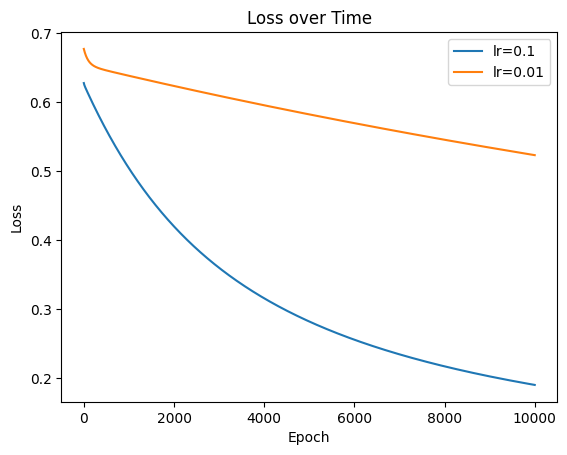

For model with lr=0.1:
Parameter containing:
tensor([[ 1.5063, 16.5358]], requires_grad=True)
Parameter containing:
tensor([-11.2917], requires_grad=True)
For model with lr=0.01:
Parameter containing:
tensor([[0.4693, 2.9988]], requires_grad=True)
Parameter containing:
tensor([-1.7569], requires_grad=True)


C:\Users\xpk20\AppData\Local\Temp\ipykernel_15512\1928357885.py:116: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from current font.
  plt.tight_layout()
C:\Users\xpk20\AppData\Local\Temp\ipykernel_15512\1928357885.py:116: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.tight_layout()
C:\Users\xpk20\AppData\Local\Temp\ipykernel_15512\1928357885.py:116: UserWarning: Glyph 39636 (\N{CJK UNIFIED IDEOGRAPH-9AD4}) missing from current font.
  plt.tight_layout()
C:\Users\xpk20\AppData\Local\Temp\ipykernel_15512\1928357885.py:116: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  plt.tight_layout()
C:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39636 (\N{CJK UNIFIED IDEOGRAPH-9AD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 

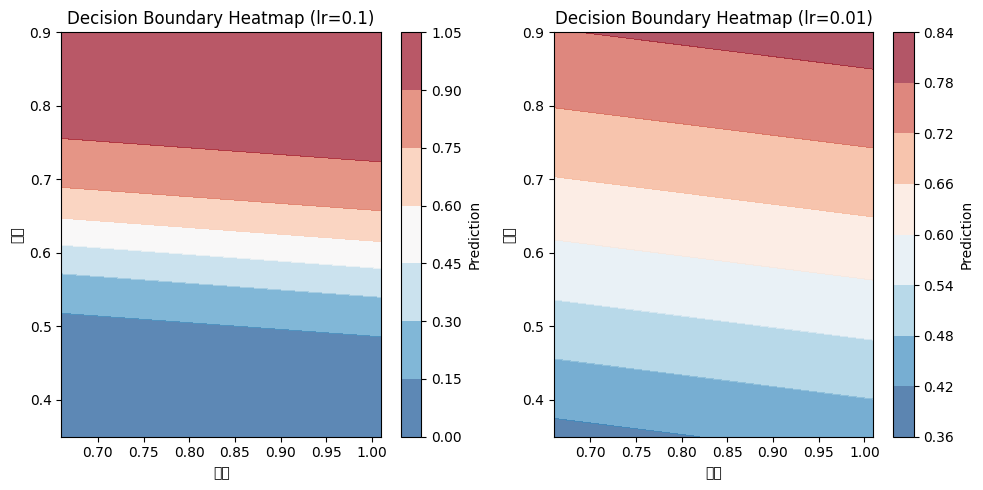

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(202404)

# Load and preprocess the data
data = pd.read_excel('data_weight_multlfeatutes.xlsx')
data['身高'] /= 200
data['體重'] /= 100
X = data[['身高', '體重']].values
Y = (data['性別'] == '男').astype(float).values  # Convert '性別' to 0 or 1

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize the model
model1 = LogisticRegressionModel()
model2 = LogisticRegressionModel()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.1)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)

# Training loop
losses1 = []
losses2 = []
for epoch in range(10000):
    # Training for model1
    model1.train()
    optimizer1.zero_grad()
    inputs = torch.tensor(X, dtype=torch.float32)
    targets = torch.tensor(Y, dtype=torch.float32).view(-1, 1)
    outputs = model1(inputs)
    loss = criterion(outputs, targets)
    losses1.append(loss.item())
    loss.backward()
    optimizer1.step()

    # Training for model2
    model2.train()
    optimizer2.zero_grad()
    outputs = model2(inputs)
    loss = criterion(outputs, targets)
    losses2.append(loss.item())
    loss.backward()
    optimizer2.step()

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch+1}/10000, Loss for model1: {losses1[-1]}, Loss for model2: {losses2[-1]}')

# Plot the loss over time
plt.plot(losses1, label='lr=0.1')
plt.plot(losses2, label='lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.legend()
plt.show()

# Print the model's weights and bias
print("For model with lr=0.1:")
print(model1.linear.weight)
print(model1.linear.bias)

print("For model with lr=0.01:")
print(model2.linear.weight)
print(model2.linear.bias)

# Decision boundary heatmap
x1_values = np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1, 100)
x2_values = np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1, 100)
xx1, xx2 = np.meshgrid(x1_values, x2_values)
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Compute model predictions
model1.eval()
model2.eval()
with torch.no_grad():
    predictions1 = model1(torch.tensor(grid_points, dtype=torch.float32)).numpy()
    predictions2 = model2(torch.tensor(grid_points, dtype=torch.float32)).numpy()

# Reshape predictions to match the grid shape
predictions1 = predictions1.reshape(xx1.shape)
predictions2 = predictions2.reshape(xx1.shape)

# Plot the heatmap for model1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx1, xx2, predictions1, cmap='RdBu_r', alpha=0.7)
plt.colorbar(label='Prediction')
plt.xlabel('身高')
plt.ylabel('體重')
plt.title('Decision Boundary Heatmap (lr=0.1)')

# Plot the heatmap for model2
plt.subplot(1, 2, 2)
plt.contourf(xx1, xx2, predictions2, cmap='RdBu_r', alpha=0.7)
plt.colorbar(label='Prediction')
plt.xlabel('身高')
plt.ylabel('體重')
plt.title('Decision Boundary Heatmap (lr=0.01)')

plt.tight_layout()
plt.show()
